In [5]:
import sys
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# uncomment the following line if 'imutils' is not installed in your python kernel
# !{sys.executable} -m pip install imutils
import imutils
from imutils import paths


import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Dropout, Activation, MaxPooling2D, Flatten
from keras.models import Sequential, load_model
from keras.losses import categorical_crossentropy, binary_crossentropy
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.regularizers import l2
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

import cv2
import time
import random
import shutil

In [16]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(224,224),
        batch_size=16 ,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'test',
        target_size=(224,224),
        batch_size=16,
        class_mode='binary')

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [27]:
model=Sequential()

model.add(Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l1_l2(0.005)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
          
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2,2)) 
model.add(Dropout(0.3))

model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2,2)) 

model.add(Flatten())
model.add(Dropout(0.3))
          
model.add(Dense(256, activation ='relu'))
model.add(Dense(128, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))         

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 128)      

In [26]:
history=model.fit(training_set, epochs=30, validation_data=test_set)

Epoch 1/30
83/83 [==============================] - 262s 3s/step - loss: 0.7810 - accuracy: 0.8988 - val_loss: 0.7875 - val_accuracy: 0.9175
Epoch 2/30
83/83 [==============================] - 255s 3s/step - loss: 0.3935 - accuracy: 0.9597 - val_loss: 0.6168 - val_accuracy: 0.9536
Epoch 3/30
83/83 [==============================] - 240s 3s/step - loss: 0.3366 - accuracy: 0.9688 - val_loss: 0.5308 - val_accuracy: 0.9330
Epoch 4/30
83/83 [==============================] - 238s 3s/step - loss: 0.3269 - accuracy: 0.9650 - val_loss: 0.4325 - val_accuracy: 0.9330
Epoch 5/30
83/83 [==============================] - 270s 3s/step - loss: 0.3682 - accuracy: 0.9505 - val_loss: 0.5814 - val_accuracy: 0.8196
Epoch 6/30
83/83 [==============================] - 321s 4s/step - loss: 0.3498 - accuracy: 0.9513 - val_loss: 0.4315 - val_accuracy: 0.9639
Epoch 7/30
83/83 [==============================] - 291s 4s/step - loss: 0.3691 - accuracy: 0.9543 - val_loss: 0.2593 - val_accuracy: 0.9691
Epoch 8/30
83

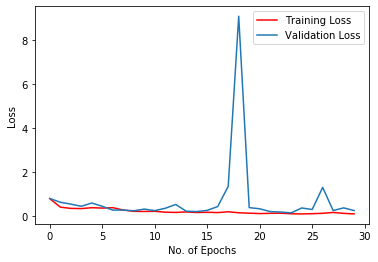

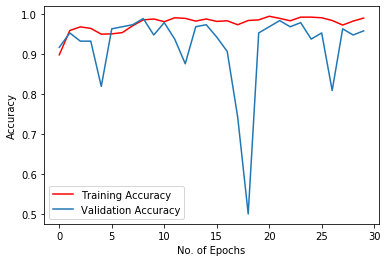

In [28]:
plt.plot(history.history['loss'],'r',label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the accuracy on validation set w.r.t the number of epochs
plt.plot(history.history['accuracy'],'r',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
model.save('dev_model.h5', history)